In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Import information from DANE AMVA
# blocks = gpd.read_file('../data/input/shape/SHP_MGN2018_INTGRD_MANZ/MGN_ANM_MANZANA.shp')
blocks = gpd.read_file('C:/Users/Laura/OneDrive - Universidad EAFIT/General - VREF_EAFIT-TEC/data/input/shape/SHP_MGN2018_INTGRD_MANZ/MGN_ANM_MANZANA.shp')
blocks = blocks[['TP27_PERSO', 'TP32_1_SEX', 'TP32_2_SEX', 'TP34_1_EDA', 'TP34_2_EDA', 'TP34_3_EDA', 'TP34_4_EDA', 'TP34_5_EDA', 'TP34_6_EDA', 'TP34_7_EDA', 'TP34_8_EDA', 'TP34_9_EDA', 'TP19_EE_E1', 'TP19_EE_E2', 'TP19_EE_E3', 'TP19_EE_E4', 'TP19_EE_E5', 'TP19_EE_E6', 'TP19_EE_E9', 'geometry']]
blocks['VIVIENDAS'] = blocks['TP19_EE_E1'] + blocks['TP19_EE_E2'] + blocks['TP19_EE_E3'] + blocks['TP19_EE_E4'] + blocks['TP19_EE_E5'] + blocks['TP19_EE_E6'] + blocks['TP19_EE_E9']
blocks = blocks.to_crs('epsg:32618')
# territory_perimeters = gpd.read_file('../data/input/shape/Colombia_urban_perimeters_name_pop/Colombia_urban_perimeters_name_pop.shp')
territory_perimeters = gpd.read_file('C:/Users/Laura/OneDrive - Universidad EAFIT/General - VREF_EAFIT-TEC/data/input/shape/Colombia_urban_perimeters_name_pop/Colombia_urban_perimeters_name_pop.shp')
territory_perimeters = territory_perimeters[['Name', 'geometry']]
territory_perimeters = territory_perimeters.to_crs('epsg:32618')

In [3]:
# Select blocks from Medellin
territory_perimeters = territory_perimeters.set_index('Name')
medellin_blocks = blocks[blocks.geometry.within(territory_perimeters.loc['MEDELLIN']['geometry'])]
territory_perimeters = territory_perimeters.reset_index()
# medellin_blocks.to_file(f'C:/Users/Laura/OneDrive - Universidad EAFIT/VREF/data/output/medellin_blocks_try.shp')

In [4]:
# Generate statistics of Medellin from medellin_blocks
medellin_statistics_gender = pd.DataFrame()
medellin_statistics_gender.loc[0, 'Mujeres'] = medellin_blocks['TP32_2_SEX'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_gender.loc[0, 'Hombres'] = medellin_blocks['TP32_1_SEX'].sum()/medellin_blocks['TP27_PERSO'].sum()

medellin_statistics_age = pd.DataFrame()
medellin_statistics_age.loc[0, '0 - 9'] = medellin_blocks['TP34_1_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, '10 - 19'] = medellin_blocks['TP34_2_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, '20 - 29'] = medellin_blocks['TP34_3_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, '30 - 39'] = medellin_blocks['TP34_4_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, '40 - 49'] = medellin_blocks['TP34_5_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, '50 - 59'] = medellin_blocks['TP34_6_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, '60 - 69'] = medellin_blocks['TP34_7_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, '70 - 79'] = medellin_blocks['TP34_8_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()
medellin_statistics_age.loc[0, 'mayor a 80'] = medellin_blocks['TP34_9_EDA'].sum()/medellin_blocks['TP27_PERSO'].sum()

medellin_statistics_ss = pd.DataFrame()
medellin_statistics_ss.loc[0, 'E1'] = medellin_blocks['TP19_EE_E1'].sum()/medellin_blocks['VIVIENDAS'].sum()
medellin_statistics_ss.loc[0, 'E2'] = medellin_blocks['TP19_EE_E2'].sum()/medellin_blocks['VIVIENDAS'].sum()
medellin_statistics_ss.loc[0, 'E3'] = medellin_blocks['TP19_EE_E3'].sum()/medellin_blocks['VIVIENDAS'].sum()
medellin_statistics_ss.loc[0, 'E4'] = medellin_blocks['TP19_EE_E4'].sum()/medellin_blocks['VIVIENDAS'].sum()
medellin_statistics_ss.loc[0, 'E5'] = medellin_blocks['TP19_EE_E5'].sum()/medellin_blocks['VIVIENDAS'].sum()
medellin_statistics_ss.loc[0, 'E6'] = medellin_blocks['TP19_EE_E6'].sum()/medellin_blocks['VIVIENDAS'].sum()
medellin_statistics_ss.loc[0, 'NN'] = medellin_blocks['TP19_EE_E9'].sum()/medellin_blocks['VIVIENDAS'].sum()

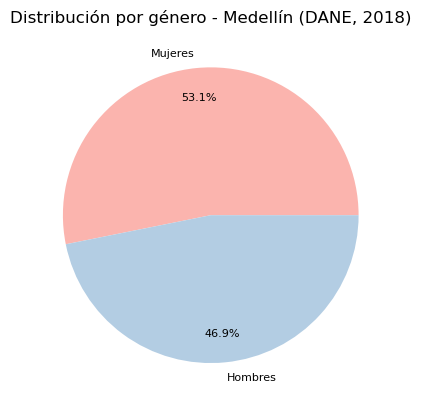

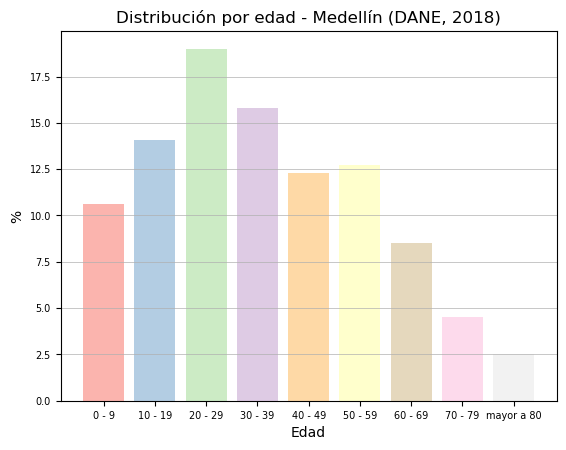

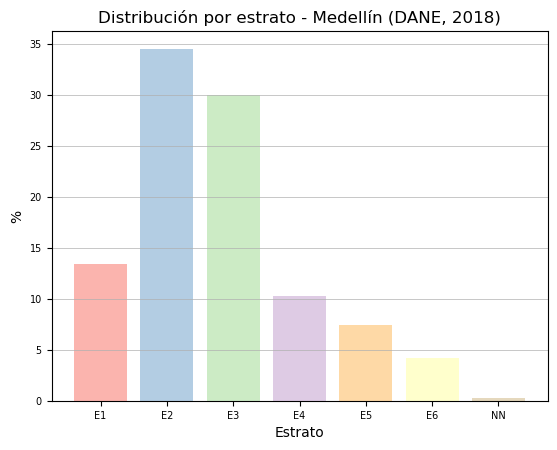

In [ ]:
# Generate graphics of statistics
list_statistics = [medellin_statistics_gender, medellin_statistics_age, medellin_statistics_ss]
list_title_statistics = ['Distribución por género - Medellín (DANE, 2018)', 'Distribución por edad - Medellín (DANE, 2018)', 'Distribución por estrato - Medellín (DANE, 2018)']
list_xlabel = ['Género', 'Edad', 'Estrato']
for i in range(0, len(list_statistics)-2):
    fig, ax = plt.subplots()
    plt.title(list_title_statistics[i])
    plt.pie(list_statistics[i].loc[0].to_list(), labels = list_statistics[i].columns,  textprops = {'fontsize': 8}, autopct = '%1.1f%%', pctdistance=0.8, colors = plt.cm.Pastel1(range(len(list_statistics[i].columns))))
    # plt.savefig(f'C:/Users/Laura/OneDrive - Universidad EAFIT/VREF/data/output/{list_title_statistics[i]}_pie.png')
    plt.show()

for i in range(1, len(list_statistics)):
    fig, ax = plt.subplots()
    plt.title(list_title_statistics[i])
    plt.xlabel(list_xlabel[i])
    plt.xticks(fontsize=7)
    plt.ylabel('%')
    plt.yticks(fontsize=7)
    plt.bar(x = list_statistics[i].columns.to_list(), height = [round(j*100, 1) for j in list_statistics[i].loc[0].to_list()], color = plt.cm.Pastel1(range(len(list_statistics[i].columns))))
    plt.grid(axis = 'y', linewidth = 0.5)
    # plt.savefig(f'C:/Users/Laura/OneDrive - Universidad EAFIT/VREF/data/output/{list_title_statistics[i]}_bar.png')
    plt.show()
